<a href="https://colab.research.google.com/github/atharv3556/Authintication-server/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Sparks Foundation
----
#GRIPJanuary23

__Name: Atharv arvind pawar__

Data Science and Business Analysis Internship

__Task2__

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [9]:
iris_dataset=pd.read_csv("/Iris.csv")

In [10]:
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris_dataset.shape

(150, 6)

In [12]:
iris_dataset.drop("Id",axis=1,inplace=True)

In [13]:
iris_dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
iris_dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
iris_dataset.duplicated().sum()

3

In [16]:
iris_dataset=iris_dataset.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
iris_dataset.shape

(147, 5)

In [17]:
iris_dataset.shape

(147, 5)

In [18]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [19]:
iris_dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


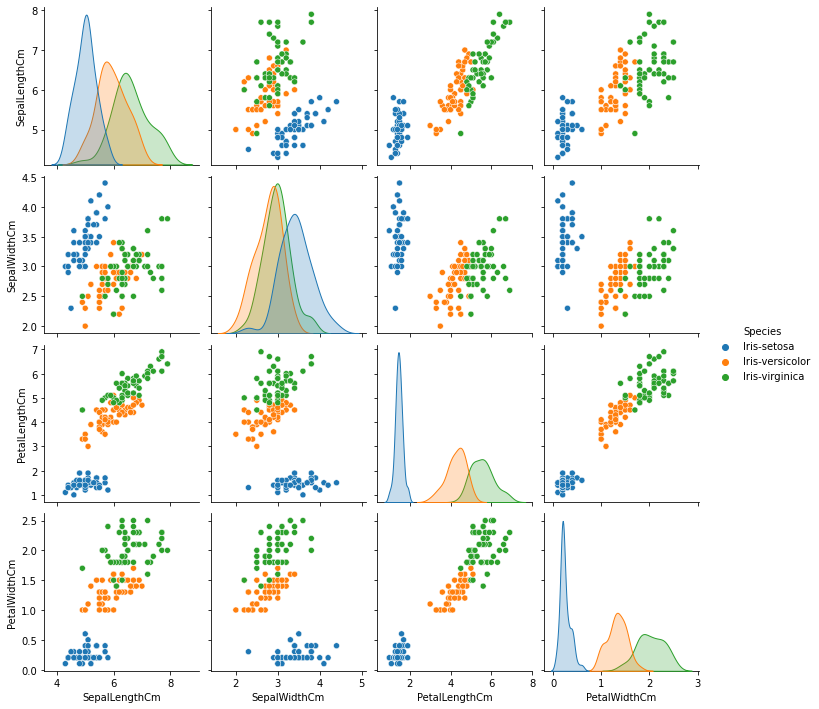

In [20]:
sns.pairplot(data=iris_dataset,hue="Species")
plt.show()

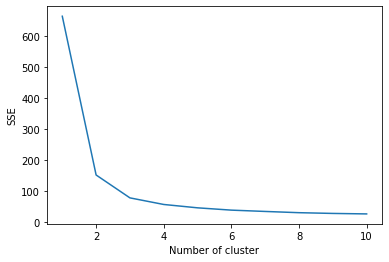

In [21]:
data = iris_dataset.iloc[:,:-1].values

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=300).fit(data)
    
    
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 123)
y = kmeans.fit_predict(data)

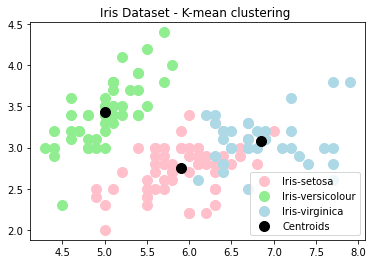

In [23]:
plt.scatter(data[y == 0, 0], data[y == 0, 1], 
            s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(data[y == 1, 0], data[y == 1, 1], 
            s = 100, c = 'lightgreen', label = 'Iris-versicolour')
plt.scatter(data[y == 2, 0], data[y == 2, 1],
            s = 100, c = 'lightblue', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
plt.title("Iris Dataset - K-mean clustering ")
plt.legend()
plt.show()